In [8]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from model.Portfolio import Portfolio
from model.Optimizer import Optimizer
plt.rcParams["figure.figsize"] = 10, 15

In [48]:
names = ["C38U", "V01", "AGS", "S63", "CJLU", "N2IU"]

p = Portfolio()

# Set risk-free investment as 2%, approximately SSB's returns
p.rf = 0.02

# Add all assets
for name in names:
    p.addAsset(f"data/{name}.csv", name)

# Convert non SGD assets to SGD
p.addExchangeRate("data/forex/SGDEUR.csv", "EUR", True)
p.addExchangeRate("data/forex/USDSGD.csv", "USD", False)

In [49]:
currentWeight = [20, 20, 10, 10, 20, 15]

normalisedWeight = np.array(currentWeight)/np.sum(currentWeight)
normalisedWeight

array([0.21052632, 0.21052632, 0.10526316, 0.10526316, 0.21052632,
       0.15789474])

In [50]:
currentResult, currentBtPlot = p.backtest(normalisedWeight)

In [51]:
currentResult

{'dateStart': Timestamp('2017-07-19 00:00:00'),
 'dateEnd': Timestamp('2019-07-11 00:00:00'),
 'days': 722,
 'valueStart': 100000.0,
 'valueEnd': 134943.007645,
 'sharpe': 1.047120196595406,
 'drawdown': 0.4497477460633648,
 'drawdownPeriod': 5,
 'moneydown': 609.6449999999895,
 'maxDrawdown': 3.4178856873061836,
 'maxDrawdownPeriod': 51,
 'maxMoneydown': 3623.229728999984,
 'averageReturns': 0.10815300443901177,
 'standardDeviation': 0.08418613710788062,
 'positiveYears': 3,
 'negativeYears': 0,
 'noChangeYears': 0,
 'bestYearReturns': 0.2263747318466387,
 'worstYearReturns': 0.036848868069999874}

In [52]:
currentBtPlot()

[[<Figure size 720x1080 with 9 Axes>]]

In [53]:
o = Optimizer(p)
optimisedWeight, tests = o.kfold(5)

In [54]:
optimisedWeight

[0.1289277063413964,
 0.43335016871560417,
 0.044233682610920186,
 0.028512457314895195,
 0.24199633771702428,
 0.12297964730015983]

In [55]:
tests

{'sharpeRaw': [20.096696129389123,
  29.82922057470578,
  14.313592101572004,
  21.262699292969163,
  81.13407517550463],
 'sharpeAvg': 33.32725665482813,
 'sharpeStd': 24.412492168500023,
 'weightsRaw': [array([0.11841208, 0.41359518, 0.04652363, 0.05488676, 0.24717224,
         0.11941012]),
  array([0.14118247, 0.38387181, 0.05716829, 0.02370495, 0.25651822,
         0.13755426]),
  array([0.11573304, 0.39041918, 0.04643396, 0.02646362, 0.29516863,
         0.12578157]),
  array([0.10543707, 0.50422801, 0.03973231, 0.02379512, 0.22526863,
         0.10153887]),
  array([0.16387388, 0.47463666, 0.03131023, 0.01371184, 0.18585396,
         0.13061342])],
 'weightsStd': 0    0.021014
 1    0.047770
 2    0.008540
 3    0.013887
 4    0.036046
 5    0.012256
 dtype: float64}

In [56]:
optimisedResult, optimisedBtPlot = p.backtest(optimisedWeight)

In [57]:
optimisedResult

{'dateStart': Timestamp('2017-07-19 00:00:00'),
 'dateEnd': Timestamp('2019-07-11 00:00:00'),
 'days': 722,
 'valueStart': 100000.0,
 'valueEnd': 134325.370991,
 'sharpe': 1.099452165419411,
 'drawdown': 0.32651555723075704,
 'drawdownPeriod': 5,
 'moneydown': 440.03000000002794,
 'maxDrawdown': 2.8442686805343036,
 'maxDrawdownPeriod': 68,
 'maxMoneydown': 3154.1561450000154,
 'averageReturns': 0.10605772143089072,
 'standardDeviation': 0.07827327476140086,
 'positiveYears': 3,
 'negativeYears': 0,
 'noChangeYears': 0,
 'bestYearReturns': 0.21559415028290485,
 'worstYearReturns': 0.037455260420000025}

<IPython.core.display.Javascript object>


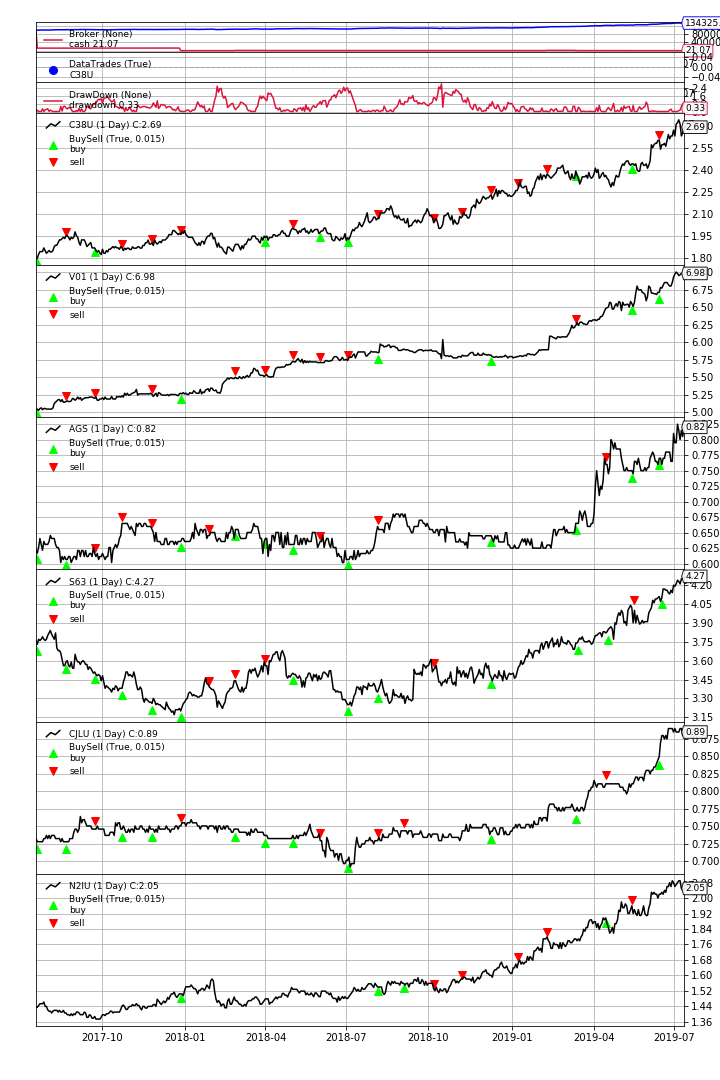

[[<Figure size 720x1080 with 9 Axes>]]

In [58]:
optimisedBtPlot()

In [59]:
dict(zip(names, np.array(optimisedWeight)*100))

{'C38U': 12.892770634139639,
 'V01': 43.33501687156042,
 'AGS': 4.423368261092018,
 'S63': 2.8512457314895197,
 'CJLU': 24.199633771702427,
 'N2IU': 12.297964730015982}